# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

In [23]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the Data

In [24]:
df = pd.read_csv("/Users/Sunny/Documents/datasets/Life-Expectancy/all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Another check of the shape of `df` is performed. It seems that there are 96 observations or rows and 4 columns. 

In [25]:
df.shape

(96, 4)

## Explore the Data

There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [26]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Fining out which years are represented in the data, and they are 2000-2015.

In [27]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Cleaning Column Name

Looking over the data, there are inconsistencies with the column names.

In [28]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

Exploring data through plots, below the distribution of `GDP` is being shown. The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution, which is a common enough distribution that it has its own name.

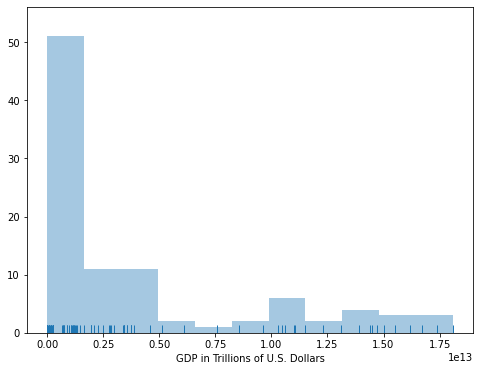

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

The distribution of `LEABY` in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column.

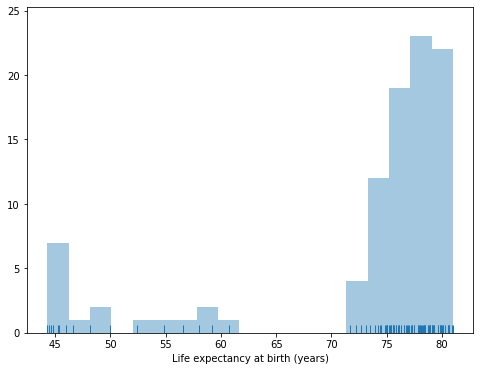

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(df.LEABY, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

The previous plots did not break up the data by countries, so finding the average `LEABY` and `GDP` by country.

In [31]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [32]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


The first plot is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

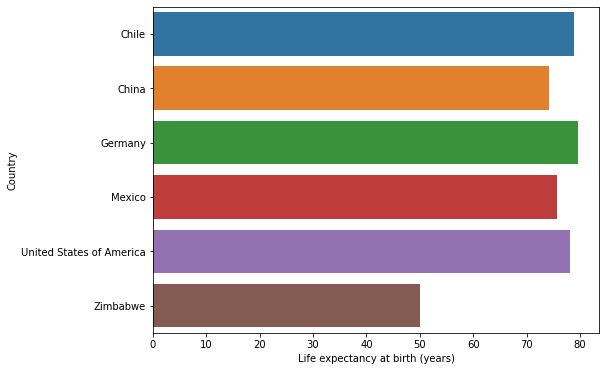

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");

For the average `GDP` by `Country` it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

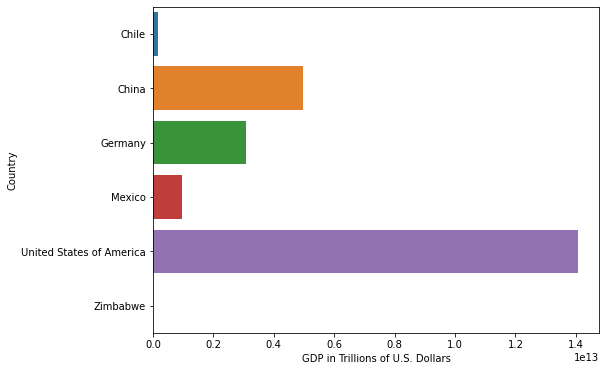

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars");

#### Violin Plots

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `LEABY` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

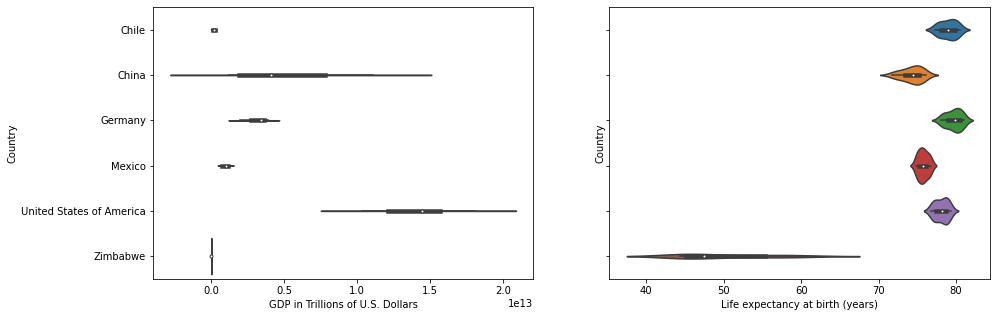

In [57]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

#### Swarm Plots
In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations. 

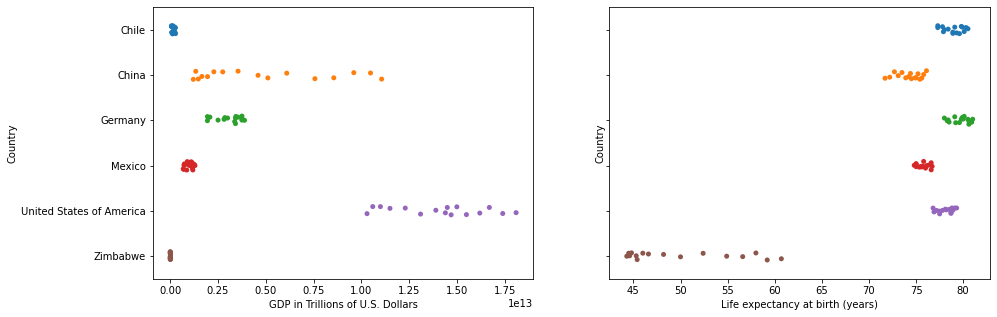

In [58]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.stripplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

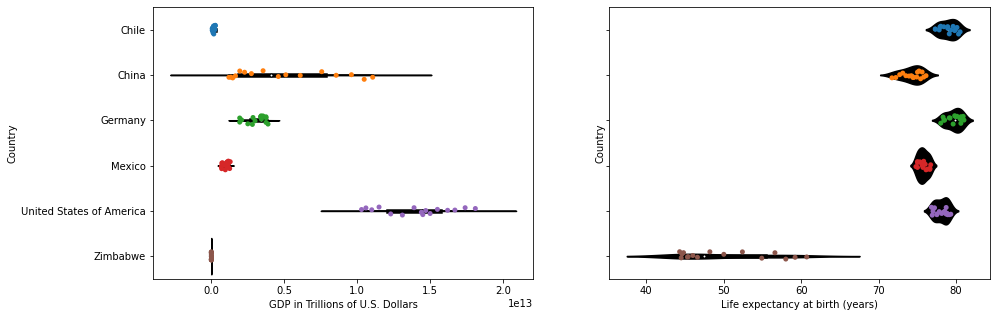

In [59]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
axes[1] = sns.stripplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

#### Line Charts
Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

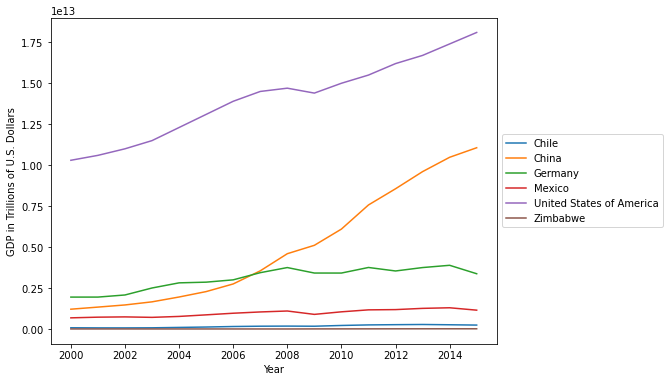

In [39]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");


In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

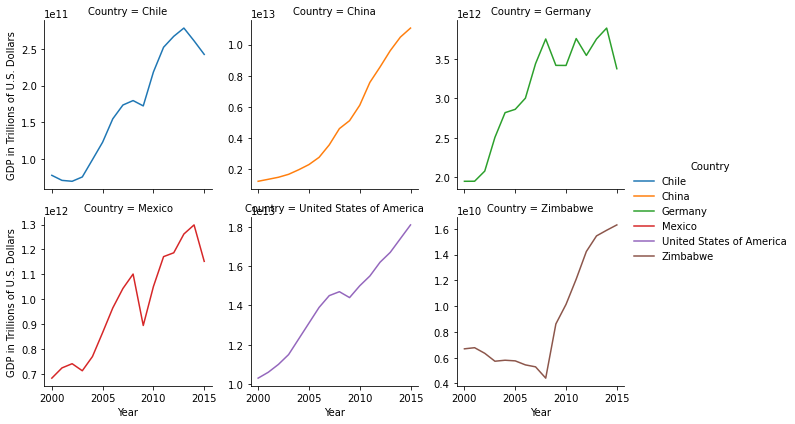

In [40]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

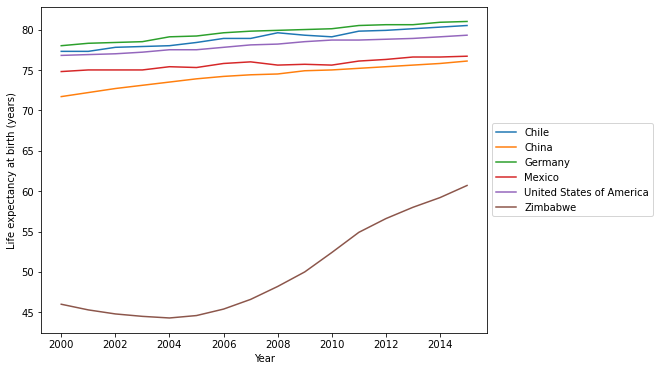

In [41]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");


Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

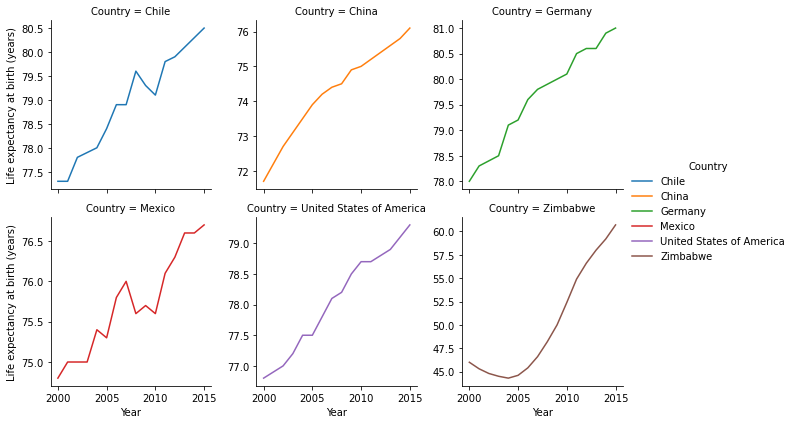

In [42]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

#### Scatter Plot
In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

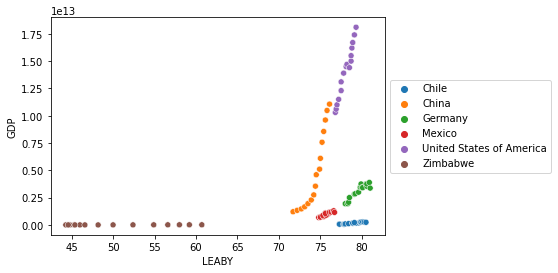

In [43]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

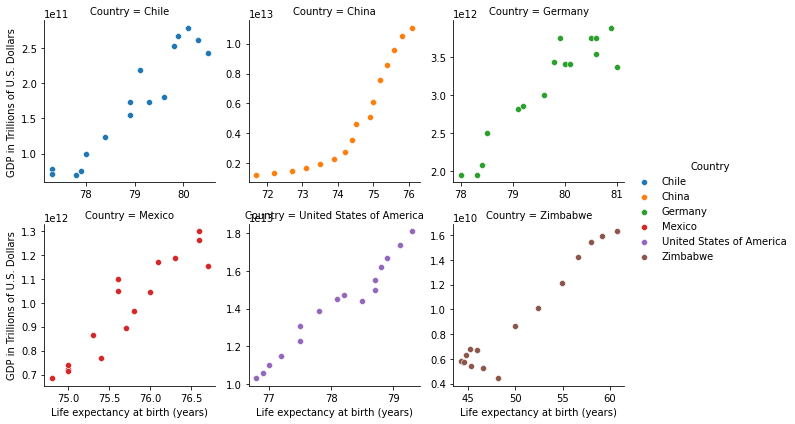

In [44]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


## Conclusions

In this project I have developed visualizations with Python with Matplotlib/Seaborn to Analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

The project was also able to answer some of my questions like life expectancy and GDP rate over time. As per my analysis GDP has increased for all countries in the list, especially for China. While there is a positive correlation between GDP and life expectancy for countries in the list. The average life expectancy was between the mid to high 70s for the countries except for Zimbabwe which was 50. Furthermore, the life expectancy had a left skew, or most of the observations were on the right side.